In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../input/insurance/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='region', ylabel='charges'>

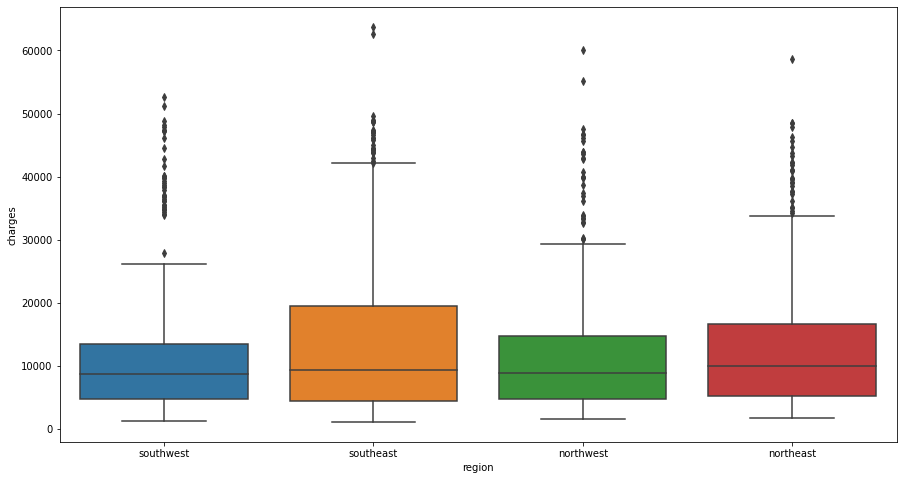

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15, 8))
sns.boxplot(data=df,x='region',y='charges')

<AxesSubplot:xlabel='age', ylabel='charges'>

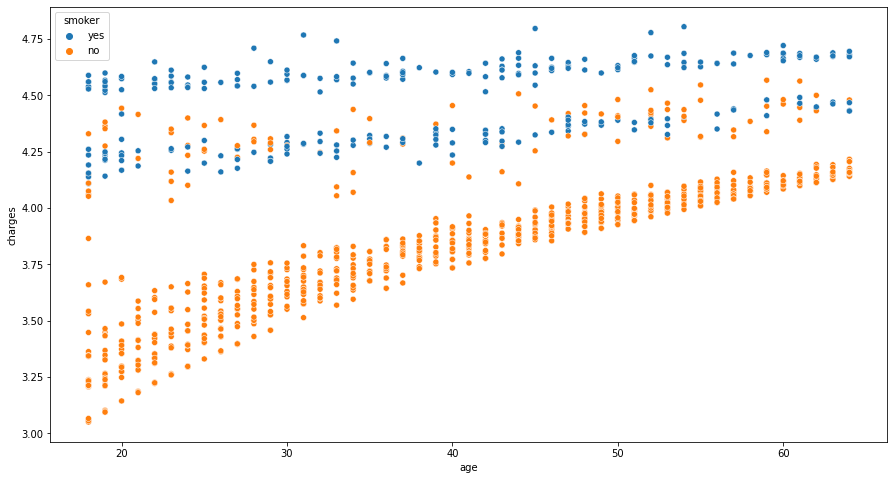

In [9]:
fig, ax = plt.subplots(1,1,figsize=(15, 8))
sns.scatterplot(data=df,x='age',y =np.log10(df['charges']), hue='smoker')

<AxesSubplot:xlabel='children', ylabel='count'>

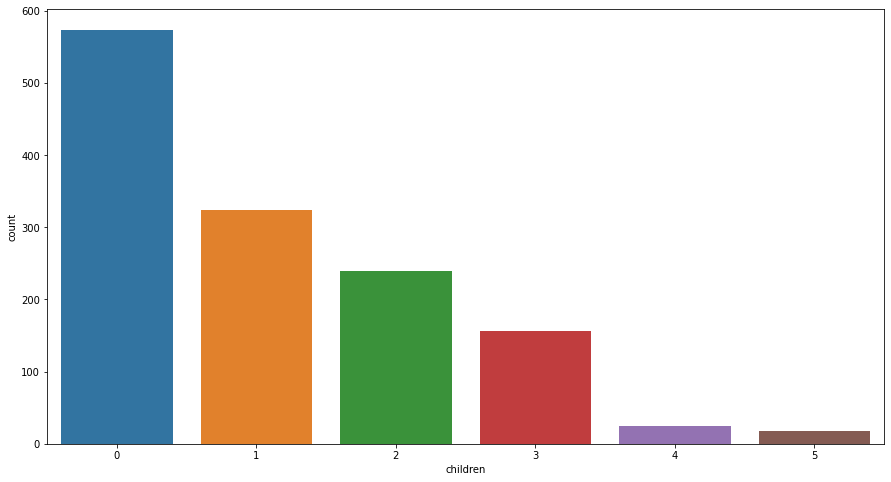

In [10]:
fig, ax = plt.subplots(1,1,figsize=(15, 8))
sns.countplot(data=df, x='children')

In [11]:
df['children_cat'] = df['children'] > 0

<AxesSubplot:xlabel='age', ylabel='charges'>

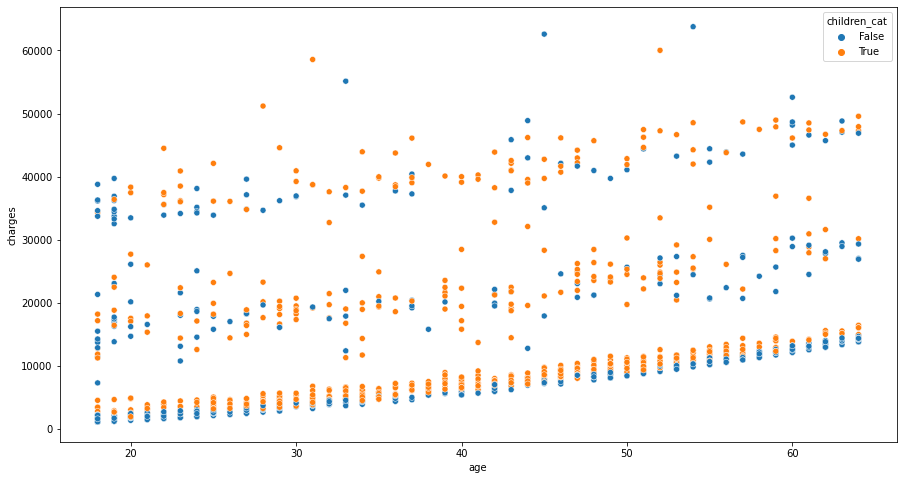

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15, 8))
sns.scatterplot(data=df,x='age',y =df['charges'], hue='children_cat')

<AxesSubplot:>

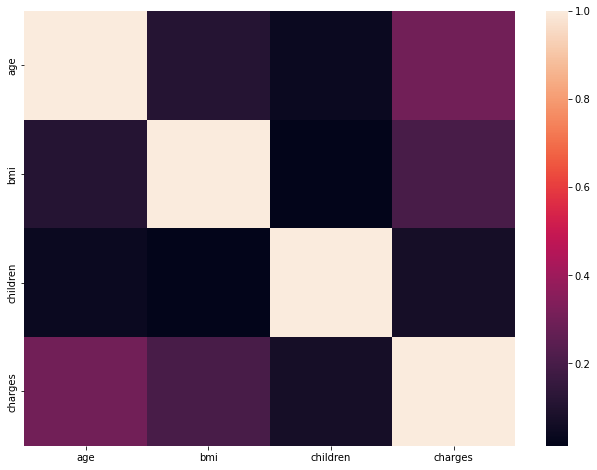

In [13]:
fig, ax = plt.subplots(1,1,figsize=(11, 8))
sns.heatmap(data=df.drop('children_cat',axis=1).corr())

In [14]:
adult_cat = ['young' if x <= 20 else 'adult' if x < 50  else 'old adult' for x in df['age']]

<AxesSubplot:ylabel='Count'>

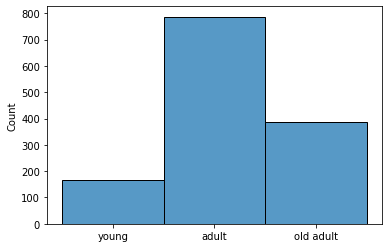

In [15]:
sns.histplot(adult_cat)

In [16]:
df['adult_cat'] = adult_cat

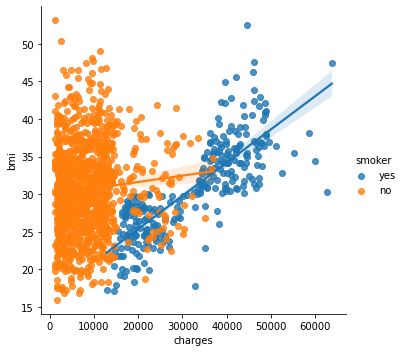

In [17]:
sns.lmplot(data=df, x='charges', y='bmi', hue='smoker')

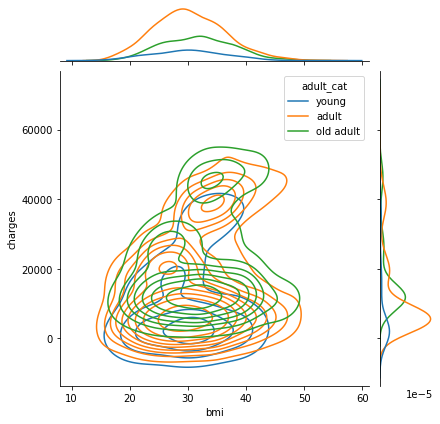

In [18]:
sns.jointplot(data=df, x='bmi', y='charges', hue='adult_cat',kind='kde', legend=True)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges,children_cat,adult_cat
0,19,female,27.900,0,yes,southwest,16884.92400,False,young
1,18,male,33.770,1,no,southeast,1725.55230,True,young
2,28,male,33.000,3,no,southeast,4449.46200,True,adult
3,33,male,22.705,0,no,northwest,21984.47061,False,adult
4,32,male,28.880,0,no,northwest,3866.85520,False,adult
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,old adult
1334,18,female,31.920,0,no,northeast,2205.98080,False,young
1335,18,female,36.850,0,no,southeast,1629.83350,False,young
1336,21,female,25.800,0,no,southwest,2007.94500,False,adult


In [20]:
df_sex_encod = df.replace(['male','female'], [0,1])

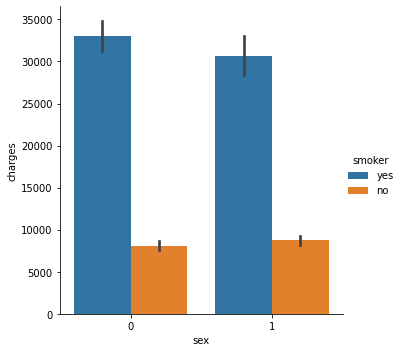

In [21]:
sns.catplot(data=df_sex_encod,x='sex', y='charges', hue='smoker',kind="bar")

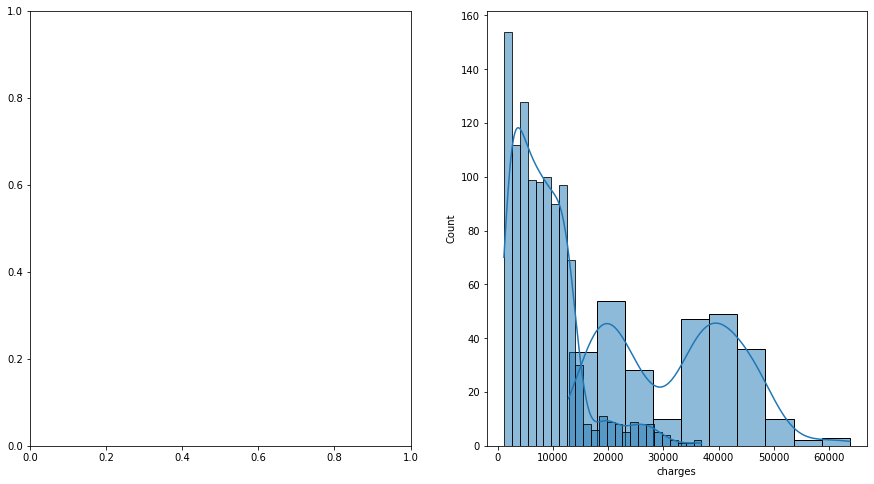

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax1 = sns.histplot(df.query('smoker == "yes"').charges, kde=True,)
ax2 = sns.histplot(df.query('smoker != "yes"').charges, kde=True,)


In [23]:
df_cat = df[['sex', 'smoker','region']]
df_dummy = pd.get_dummies(df_cat)
df_formated = df.drop(['sex', 'smoker','region'],axis = 1)
df_2 = pd.concat([df, df_dummy], axis=1)

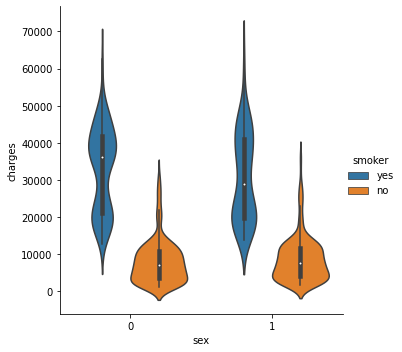

In [24]:
sns.catplot(data=df_sex_encod,x='sex', y='charges', hue='smoker',kind="violin")

In [25]:
df = df_2.drop(['region', 'smoker','sex', 'children_cat', 'adult_cat'],axis=1)

In [26]:
X = df.drop('charges', axis=1)

y = df['charges']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 27 )

In [29]:
X_train.shape, X_test.shape

((1003, 11), (335, 11))

In [30]:
X_test.dtypes

age                   int64
bmi                 float64
children              int64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [31]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
541,20,31.790,2,1,0,1,0,0,0,1,0
25,59,27.720,3,1,0,1,0,0,0,1,0
412,26,17.195,2,1,0,0,1,1,0,0,0
964,52,36.765,2,0,1,1,0,0,1,0,0
672,36,29.700,0,0,1,1,0,0,0,1,0


In [32]:
X_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
arbolito = DecisionTreeRegressor(max_depth=4, min_samples_split=20, random_state=27)

In [35]:
arbolito.fit(X_train, y_train);

In [36]:
y_pred = arbolito.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [37]:
y_pred

,0
0,14758.454833
1,14758.454833
2,4856.433810
3,4856.433810
4,8189.859727
...,...
330,45400.735284
331,13203.368325
332,4856.433810
333,14758.454833


In [38]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [39]:
MAE_tree_reg = metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)

In [40]:
print(RMSE_tree_reg, MSE_tree_reg,MAE_tree_reg)

4857.793843210118 23598161.023130134 2777.8774907319694


In [41]:
print("R-Squared on train dataset={}".format(arbolito.score(X_train,y_train)))

R-Squared on train dataset=0.8737823459102606


In [42]:
print("R-Squared on test dataset={}".format(arbolito.score(X_test,y_test)))

R-Squared on test dataset=0.8494688242841348


In [43]:
scores = cross_val_score(arbolito, X_train, y_train, cv=5)
print(np.sqrt(scores))

[0.9460842  0.89808975 0.93506161 0.9397161  0.89312213]
